# Задача 9.26

In [1]:
import numpy as np
import scipy as sp

x = [1.90, 1.91, 1.92, 1.93, 1.94] 

Найдем значения функции в этих точках:

In [2]:
y = [0, 0, 0, 0, 0]
y[0] = x[0]**7 + 28*x[0]**4 - 480
y[1] = x[1]**7 + 28*x[1]**4 - 480
y[2] = x[2]**7 + 28*x[2]**4 - 480
y[3] = x[3]**7 + 28*x[3]**4 - 480
y[4] = x[4]**7 + 28*x[4]**4 - 480
print y[0], y[1], y[2], y[3], y[4]

-25.7140261 -14.6254167393 -3.30746392216 8.24394354005 20.032983012


Теперь посчитаем коэффициенты а, b, c и d:

In [3]:
a_11 = (x[1] - x[0])/(y[1]-y[0])
a_12 = (x[2] - x[1])/(y[2]-y[1])
a_13 = (x[3] - x[2])/(y[3]-y[2])
a_14 = (x[4] - x[3])/(y[4]-y[3])
print a_11, a_12, a_13, a_14

0.000901826340407 0.000883552013478 0.000865695373721 0.000848245527026


In [4]:
b_11 = (a_12 - a_11)/(y[2] - y[0])
b_12 = (a_13 - a_12)/(y[3] - y[1])
b_13 = (a_14 - a_13)/(y[4] - y[2])
print b_11, b_12, b_13

-8.15579238953e-07 -7.80810636543e-07 -7.4762264598e-07


In [5]:
c_11 = (b_12 - b_11)/(y[3] -y[0])
c_12 = (b_13 - b_12)/(y[4] -y[1])
print c_11, c_12

1.02387165012e-09 9.57574233126e-10


In [6]:
d_11 = (c_12 - c_11)/(y[4] - y[0])
print d_11

-1.44921861073e-12


Интерполяционный многочлен будет 4 степени, покажем формулу, по которой его найдем:

In [9]:
 print "P_4(y) = x[0] + a_11*(y - y[0]) + b_11*(y - y[0])*(y - y[1]) +c_11*(y - y[0])*(y - y[1])*(y - y[2]) + d_11*(y - y[0])*(y - y[1])*(y - y[2])*(y - y[3])"

P_4(y) = x[0] + a_11*(y - y[0]) + b_11*(y - y[0])*(y - y[1]) +c_11*(y - y[0])*(y - y[1])*(y - y[2]) + d_11*(y - y[0])*(y - y[1])*(y - y[2])*(y - y[3])


Мы ищем корень уравнения, поэтому подставим значение y=0 в формулу и посчитаем ее значение

In [10]:
 x_0= x[0] - a_11*y[0] + b_11*y[0]*y[1] - c_11*y[0]*y[1]*y[2] + d_11*y[0]*y[1]*y[2]*y[3]
print "x_0 =", x_0

x_0 = 1.92288415278


Мы нашли x_0 - корень уравнения x^7 + 28x^4 - 480 = 0, как и предполагалось в условии задачи 1.92 < x_0 < 1.93, x_0 = 1.923

Построим график функции y = x^7 + 28x^4 - 480, увидим, что действительно,график функции пересекает ось ОX в точке x_0 = 1.923 :

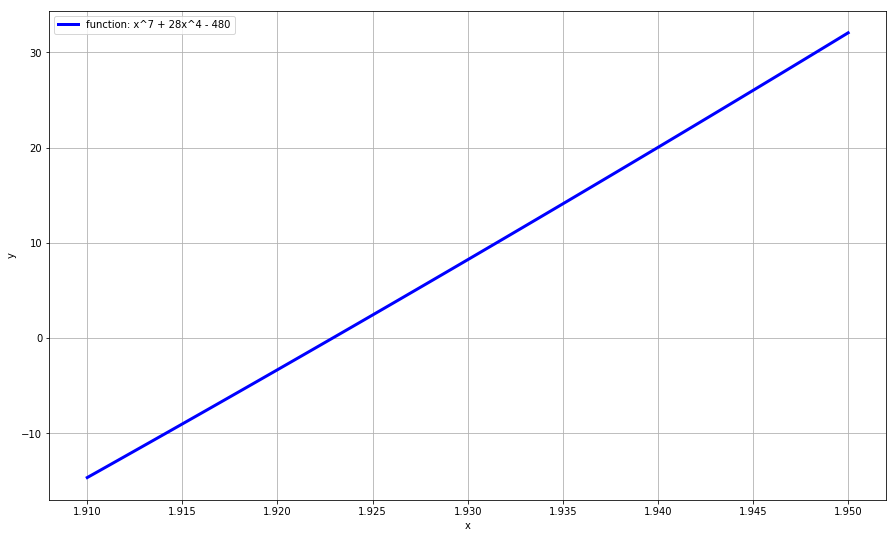

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def g(x):
    return (x**7 + 28*x**4-480)

fig, ax = plt.subplots(figsize=[15, 9])
x = np.linspace(1.91, 1.95, 50)
y = g(x)

plt.plot(x,y, 'blue', lw=3, label = 'function: x^7 + 28x^4 - 480')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
ax.grid(True)

Оценим погрешность интерполяции в найденной точке x_0 = 1.92288415278:

Считаем по формуле для погрешности алгебраической интерполяции:
$$R_6(t) = \cfrac{f^{(6)}(x_0)}{6!}*(x_0 -x_1)(x_0 -x_2)(x_0 -x_3)(x_0 -x_4)$$

 Возьмем шестую производную от функции $f_{pr}(x) = x^7 + 28*x^4 -400 $:
 
$ f^{(6)}(x) = 7!*x$
 
 Так как в моей задаче обратная интерполяция, то $f_{obr} = \cfrac{1}{f_{pr}}$
 
 Тогда считаем что, наши функции дифференцируемы 6 раз, тогда 
 
 $ f_{obr}^{(6)}(x) = \cfrac{1}{f_{obr}^{(6)}(x)} = \cfrac{1}{7!*x}$

In [3]:
x_0 = 1.92288415278
x_00 = 1.90
x_1 = 1.91
x_2 = 1.92
x_3 = 1.93
x_4 = 1.94

R_6 = (x_0 - x_00)*(x_0 -x_1)*(x_0 -x_2)*(x_0 -x_3)*(x_0 -x_4)/(7*6*5*4*3*2*x_0*6*5*4*3*2)

In [6]:
print "Ответ:", "R_6 =",R_6, " - погрешность интерполяции"

Ответ: R_6 = 1.48428681603e-17  - погрешность интерполяции
